In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Diplomatic2/Implementation")
!ls

 AGNN_1			     elliptic_txs_features.csv	'GRL_FINAL (4).ipynb'
 AGNN_2			     GAT_1			 GRL.ipynb
 AGNN_3			     GAT_2			 Node2Vec
 data_balanced_1000.obj      GAT_2_1			 NoteBooks
 data_balanced_500.obj	     GAT_3			 SAGE_1
 data.obj		     GAT_FL_1			 SAGE_2
 DGI			     GAT_RELU_1			 SAGE_3
 elliptic_txs_classes.csv    GAT_TEST			 stellar.obj
 elliptic_txs_edgelist.csv   GRL_2.ipynb


In [ ]:
#PYTORCH INSTALL
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 50.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.9/873.9 KB 21.2

In [ ]:
import pickle   
import torch
from torch_geometric.data import Data

fileObj = open('data.obj', 'rb')
data = pickle.load(fileObj)
fileObj.close()
print(data)

Data(x=[203769, 165], edge_index=[2, 234355], y=[203769], n_id=[203769], train_mask=[203769], val_mask=[203769], test_mask=[203769])


In [ ]:
#USE GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
#EDW NA DW ALLES PERIPTWSEIS GIA BATCHES!!!
#Epishs na dw th lista me tous geitones
from torch_geometric.loader import NeighborLoader

train_loader = NeighborLoader(data,num_neighbors=[-1, -1,-1], shuffle=True,batch_size=203769)

counter = 0
for batch in train_loader:

    print(len(batch.n_id))
    print(len(batch.y))
    print(type(batch))
    print(batch.test_mask)

203769
203769
<class 'torch_geometric.data.data.Data'>
tensor([False, False, False,  ..., False, False, False])


In [ ]:
#SCRIPT 16
#METRICS
!pip install torchmetrics
from torchmetrics.classification import AUROC
from torchmetrics.classification import BinaryPrecision
from torchmetrics.classification import BinaryRecall
from torchmetrics.classification import BinaryConfusionMatrix
from torchmetrics.classification import MulticlassRecall
from torchmetrics.classification import MulticlassPrecision
from torchmetrics.classification import MulticlassAUROC
from torchmetrics.classification import BinaryF1Score
from torchmetrics.classification import MulticlassF1Score

confmat = BinaryConfusionMatrix().to(device)
recall = MulticlassRecall(num_classes=2, average=None).to(device)
precision = MulticlassPrecision(num_classes=2, average=None).to(device)
aucroc = MulticlassAUROC(task="multiclass", num_classes=2).to(device)
metric = BinaryF1Score(average=None).to(device)
metric2 = MulticlassF1Score(num_classes=2, average=None).to(device)

def conf_matrix(pred_y, y):
  #confmat = BinaryConfusionMatrix().to(device)

  return confmat(pred_y, y).cpu().detach().numpy()

def brecall(pred_y, y):
  #recall = BinaryRecall().to(device)
  #recall = MulticlassRecall(num_classes=2, average=None).to(device)

  return recall(pred_y, y).cpu().detach().numpy()

def bprecision(pred_y, y):
  #precision = MulticlassPrecision(num_classes=2, average=None).to(device)

  return precision(pred_y, y).cpu().detach().numpy()

def auc_roc(pred_y, y):
  #aucroc = AUROC(task="binary").to(device)
  #print('AUC ROC',pred_y[:10])
  #print('AUC ROC',y.shape)
  #aucroc = MulticlassAUROC(task="multiclass", num_classes=2).to(device)

  return aucroc(pred_y, y).cpu().detach().numpy()

def f1score(pred_y, y):
  #metric = BinaryF1Score(average=None).to(device)

  return metric2(pred_y, y).cpu().detach().numpy()


def accuracy(pred_y, y):
    
    return ((pred_y == y).sum() / len(y)).item() 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 34.8 MB/s eta 0:00:00


In [ ]:
#SCRIPT 17
def train(model,epochs,yes_no):

    weigths = [2.5, 0.625]

    if yes_no == True:

      wei = torch.FloatTensor(weigths).to(device)
      print('WEIGTHS = ',wei)
      criterion = torch.nn.CrossEntropyLoss(weight=wei)
    else:
      criterion = torch.nn.CrossEntropyLoss()

    #criterion = torch.nn.CrossEntropyLoss()
    #criterion2 = torch.nn.NLLLoss()
    optimizer = model.optimizer

    train_loss_total = []
    val_loss_total = []
    best_model = model
    best_val_loss = 1000.0

    model.train()
    for epoch in range(epochs+1):
      total_loss = 0
      total_val_loss = 0
      acc = 0
      val_loss = 0
      val_acc = 0
      auc_roc_train = 0
      auc_roc_val = 0 
      pre_train = 0 
      pre_val = 0
      recall_train = 0
      recall_val = 0
      f1_train = 0
      f1_val = 0
      nll_loss_train = 0
      nll_loss_val = 0
 
      # Train on batches
      for batch in train_loader:
        optimizer.zero_grad()
        
        logit, out = model(batch.x, batch.edge_index)
        loss = criterion(logit[batch.train_mask], batch.y[batch.train_mask])
        total_loss += float(loss)

        #nll_loss_train = criterion2(out[batch.train_mask], batch.y[batch.train_mask])
        #nll_loss_val = criterion2(out[batch.val_mask], batch.y[batch.val_mask])


        acc += accuracy(out[batch.train_mask].argmax(dim=1), batch.y[batch.train_mask])
        auc_roc_train += auc_roc(out[batch.train_mask], batch.y[batch.train_mask])
        pre_train += bprecision(out[batch.train_mask].argmax(dim=1), batch.y[batch.train_mask])
        recall_train += brecall(out[batch.train_mask].argmax(dim=1), batch.y[batch.train_mask])
        f1_train += f1score(out[batch.train_mask].argmax(dim=1), batch.y[batch.train_mask])
        conf_matrix_train = conf_matrix(out[batch.train_mask].argmax(dim=1), batch.y[batch.train_mask])

        print(conf_matrix_train)

        loss.backward()
        optimizer.step()

        # Validation
        with torch.no_grad():
          val_loss = criterion(logit[batch.val_mask], batch.y[batch.val_mask])
          total_val_loss += float(val_loss)

          val_acc += accuracy(out[batch.val_mask].argmax(dim=1), batch.y[batch.val_mask])
          auc_roc_val += auc_roc(out[batch.val_mask], batch.y[batch.val_mask])
          pre_val += bprecision(out[batch.val_mask].argmax(dim=1), batch.y[batch.val_mask])
          recall_val += brecall(out[batch.val_mask].argmax(dim=1), batch.y[batch.val_mask])
          f1_val += f1score(out[batch.train_mask].argmax(dim=1), batch.y[batch.train_mask])
          conf_matrix_val = conf_matrix(out[batch.val_mask].argmax(dim=1), batch.y[batch.val_mask])

          #print(conf_matrix_val)
          print('TRAIN LOSS', total_loss)
          print('VALIDATION LOSS', total_val_loss)

          print("Train accuracy = ", acc/len(train_loader), "Val accuracy = ", val_acc/len(train_loader))
          print("AUC ROC SCORE TRAIN = ",auc_roc_train/len(train_loader),"AUC ROC SCORE VAL = ", auc_roc_val/len(train_loader))
          print("precision SCORE TRAIN = ",pre_train/len(train_loader),"precision SCORE VAL = ", pre_val/len(train_loader))
          print("RECALL SCORE TRAIN = ",recall_train/len(train_loader),"RECALL SCORE VAL = ", recall_val/len(train_loader))
          print("F1 SCORE TRAIN = ",f1_train/len(train_loader),"F1 SCORE VAL = ", f1_val/len(train_loader))

        if(total_val_loss < best_val_loss):
          best_val_loss = total_val_loss
          best_model = model
          print("NEW BEST at epoch ", epoch)
        train_loss_total.append(total_loss)
        val_loss_total.append(total_val_loss)
      
    return best_model, train_loss_total, val_loss_total

def test(model, data):
    """Evaluate the model on test set and print the accuracy score."""
    with torch.no_grad():
      model.eval()
      _, out = model(data.x, data.edge_index)
      acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
      auc_roc_acc = auc_roc(out[data.test_mask], data.y[data.test_mask])
      precision_score = bprecision(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
      recall_score = brecall(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
      f1_test = f1score(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
      conf_mat = conf_matrix(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])


    return acc, auc_roc_acc, precision_score, recall_score,f1_test, conf_mat



In [ ]:
#SCRIPT 19 CLASS WEIGTHS
from sklearn.utils import class_weight
import numpy as np
list_ones = [1]*2000
list_zero = [0]*500
list1 = list_ones + list_zero
print(len(list1))
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(list1),y=list1)
print(class_weights)

2500
[2.5   0.625]


In [ ]:
# SCRIPT 18
#TRAIN FUNC 2 

def train2(model, epochs,yes_no):
    weigths = [2.5, 0.625]

    if yes_no == True:

      wei = torch.FloatTensor(weigths).to(device)
      print('WEIGTHS = ',wei)
      criterion = torch.nn.CrossEntropyLoss(weight=wei)
    else:
      criterion = torch.nn.CrossEntropyLoss()

    optimizer = model.optimizer
    
    model.train()

    train_loss_total = []
    val_loss_total = []
    best_model = model
    best_val_loss = 1000.0
    
    for epoch in range(epochs+1):
      total_loss = 0
      total_val_loss = 0
      acc = 0
      val_loss = 0
      val_acc = 0
      auc_roc_train = 0
      auc_roc_val = 0 
      pre_train = 0 
      pre_val = 0
      recall_train = 0
      recall_val = 0
      f1_train = 0
      f1_val = 0
 
      # Train on batches
      
      optimizer.zero_grad()
        
      logit, out = model(data.x, data.edge_index)
      loss = criterion(logit[data.train_mask], data.y[data.train_mask])
      total_loss += float(loss)

      acc += accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
      auc_roc_train += auc_roc(out[data.train_mask], data.y[data.train_mask])
      pre_train += bprecision(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
      recall_train += brecall(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
      f1_train += f1score(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
      conf_matrix_train = conf_matrix(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
      print(conf_matrix_train)
      loss.backward()
      optimizer.step()

        # Validation
      with torch.no_grad():  
        val_loss = criterion(logit[data.val_mask], data.y[data.val_mask])
        total_val_loss += float(val_loss)
        print('TRAIN LOSS', total_loss)
        print('VALIDATION LOSS', total_val_loss)

        val_acc += accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
        auc_roc_val += auc_roc(out[data.val_mask], data.y[data.val_mask])
        pre_val += bprecision(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
        recall_val += brecall(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
        f1_val += f1score(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
        conf_matrix_val = conf_matrix(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
        print(conf_matrix_val)

        print("Train accuracy = ", acc, "Val accuracy = ", val_acc)
        print("AUC ROC SCORE TRAIN = ",auc_roc_train,"AUC ROC SCORE VAL = ", auc_roc_val)
        print("precision SCORE TRAIN = ",pre_train,"precision SCORE VAL = ", pre_val)
        print("RECALL SCORE TRAIN = ",recall_train,"RECALL SCORE VAL = ", recall_val)
        print("F1 SCORE TRAIN = ",f1_train,"F1 SCORE VAL = ", f1_val)

        if(total_val_loss < best_val_loss):
          best_val_loss = total_val_loss
          best_model = model
          print("NEW BEST at epoch ", epoch)
        train_loss_total.append(total_loss)
        val_loss_total.append(total_val_loss)  

    return best_model, train_loss_total, val_loss_total  

In [ ]:
#TEST WITH FINAL LAYER
from torch_geometric.nn import GATConv
import torch.nn.functional as F

#layers_GATv2 = [1,2]
embe_GATv2 = [32,64]
loader_GATv2 = [0,1]
heads_GATv2 = [4,8]
weigths_GATv2 = [True,False]
GAT_HPsv2 = []
GAT_HPsv2.append(layers_GATv2)
GAT_HPsv2.append(embe_GATv2)
GAT_HPsv2.append(loader_GATv2)
GAT_HPsv2.append(heads_GATv2)
GAT_HPsv2.append(weigths_GATv2)

class GAT2(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads, dropout=0.6)
        # On the Pubmed dataset, use `heads` output heads in `conv2`.
        self.conv2 = GATConv(hidden_channels * heads, out_channels, heads=1,concat=False, dropout=0.6)
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.005, weight_decay=5e-4)  


    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x, F.log_softmax(x, dim=1) 

In [ ]:
#SCRIPT 20
import numpy as np
import pandas as pd
import os
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch_geometric
from torch.nn import Parameter
from torch_geometric.utils.convert import to_networkx
import networkx as nx
import urllib.request
import tarfile
from torch_geometric.nn import GraphSAGE
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import GATConv
from torch_geometric.nn import AGNNConv
from torch_geometric.loader import NeighborLoader
from torch_geometric.utils import to_networkx
#HYPER PARAMETERS DICTIONARYS
#FOR GAT
import itertools

layers_GAT = [2,3]
embe_GAT = [32,64]
loader_GAT = [0,1]
heads_GAT = [4,8]
weigths_GAT = [True,False]
GAT_HPs = []
GAT_HPs.append(layers_GAT)
GAT_HPs.append(embe_GAT)
GAT_HPs.append(loader_GAT)
GAT_HPs.append(heads_GAT)
GAT_HPs.append(weigths_GAT)


class GATmodel(torch.nn.Module):
    def __init__(self,layers,emb_size,head_num):
        super(GATmodel, self).__init__()
        self.hid = emb_size
        self.in_head = head_num
        self.out_head = 1
        self.layers = layers

        ##ALAKSA TO CONCAT SE FALSE
        if self.layers == 3:
          self.conv1 = GATConv(165, self.hid, heads=self.in_head, dropout=0.6)
          self.conv = GATConv(self.hid*self.in_head, self.hid, heads=self.in_head, dropout=0.6)
          self.conv2 = GATConv(self.hid*self.in_head, self.hid, heads=self.in_head,concat=False, dropout=0.6)
          self.linear = torch.nn.Linear(self.hid,2)
          self.optimizer = torch.optim.Adam(self.parameters(), lr=0.005, weight_decay=5e-4)
        else:
          self.conv1 = GATConv(165, self.hid, heads=self.in_head, dropout=0.6)
          self.conv2 = GATConv(self.hid*self.in_head, self.hid, heads=self.in_head,concat=False, dropout=0.6)
          self.linear = torch.nn.Linear(self.hid,2)
          self.optimizer = torch.optim.Adam(self.parameters(), lr=0.005, weight_decay=5e-4)  
          

    def forward(self,x, edge_index):
        
        # Dropout before the GAT layer is used to avoid overfitting

        if self.layers == 3:

          x = F.dropout(x, p=0.6, training=self.training)
          x = self.conv1(x, edge_index)
          x = F.elu(x)
          #x = F.dropout(x, p=0.6, training=self.training)
          x = self.conv(x, edge_index)
          x = F.elu(x)
          #x = F.dropout(x, p=0.6, training=self.training)
          x = self.conv2(x, edge_index)
          #EDW RELU
          x = F.elu(x)
          x = F.dropout(x, p=0.6, training=self.training)
          x = self.linear(x)
        else:
          x = F.dropout(x, p=0.6, training=self.training)
          x = self.conv1(x, edge_index)
          x = F.elu(x)
          #x = F.dropout(x, p=0.6, training=self.training)
          x = self.conv2(x, edge_index)
          #EDW RELU
          x = F.elu(x)
          x = F.dropout(x, p=0.6, training=self.training)
          x = self.linear(x)
            
        return x,F.log_softmax(x, dim=1)    

layers_SAGE = [2,3]
emb_size_SAGE = [32,64,128]
loader_SAGE = [0]
weigths_SAGE = [False]

SAGE_HPs = []
SAGE_HPs.append(layers_SAGE)
SAGE_HPs.append(emb_size_SAGE)
SAGE_HPs.append(loader_SAGE)
SAGE_HPs.append(weigths_SAGE)

class GraphSAGE(torch.nn.Module):
  """GraphSAGE"""
  def __init__(self,num_layers, dim_h):
    super().__init__()

    self.num_layers = num_layers
    self.dim_hidden = dim_h
    
    if self.num_layers == 3:
      self.sage1 = SAGEConv(165, dim_h*2)
      self.sage2 = SAGEConv(dim_h*2, dim_h)
      self.sage3 = SAGEConv(dim_h, dim_h)
      self.linear = self.linear = torch.nn.Linear(dim_h,2)
      self.optimizer = torch.optim.Adam(self.parameters(),lr=0.01,weight_decay=5e-4)
    else:
      self.sage1 = SAGEConv(165, dim_h*2)
      self.sage2 = SAGEConv(dim_h*2, dim_h)
      self.linear = self.linear = torch.nn.Linear(dim_h,2)
      self.optimizer = torch.optim.Adam(self.parameters(),lr=0.01,weight_decay=5e-4)
  def forward(self, x, edge_index):

    if self.num_layers == 3:
      h = self.sage1(x, edge_index)
      h = torch.relu(h)
      h = F.dropout(h, p=0.5, training=self.training)
      h = self.sage2(h, edge_index)
      h = torch.relu(h)
      h = F.dropout(h, p=0.2, training=self.training)
      h = self.sage3(h, edge_index)
      h = torch.relu(h)
      h = F.dropout(h, p=0.2, training=self.training)
      h = self.linear(h)

    else:
      h = self.sage1(x, edge_index)
      h = torch.relu(h)
      h = F.dropout(h, p=0.5, training=self.training)
      h = self.sage2(h, edge_index)
      h = torch.relu(h)
      h = F.dropout(h, p=0.2, training=self.training)
      h = self.linear(h)
       
    return h, F.log_softmax(h, dim=1)        

layers_AGNN = [2,3]
emb_size_AGNN = [32,64,128]
loader_AGNN = [0,1]
weigths_AGNN = [False]

AGNN_HPs = []
AGNN_HPs.append(layers_AGNN)
AGNN_HPs.append(emb_size_AGNN)
AGNN_HPs.append(loader_AGNN)
AGNN_HPs.append(weigths_AGNN)


class AGNN(torch.nn.Module):
    def __init__(self,num_layers,hidden):
        super().__init__()

        self.num_layers = num_layers
        self.hidden = hidden

        self.lin1 = torch.nn.Linear(165, hidden)
        self.prop1 = AGNNConv(requires_grad=False)
        self.prop2 = AGNNConv(requires_grad=True)

        if num_layers == 3:

          self.prop3 = AGNNConv(requires_grad=True)
          
        self.lin2 = torch.nn.Linear(hidden, 2)
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.005, weight_decay=5e-4)


    def forward(self, x, edge_index):

        x = F.dropout(x, training=self.training)
        x = F.relu(self.lin1(x))
        x = self.prop1(x, edge_index)
        x = self.prop2(x, edge_index)

        if self.num_layers == 3:
          x = self.prop3(x,edge_index)

        x = F.dropout(x, training=self.training)
        x = self.lin2(x)  
        return x,F.log_softmax(x, dim=1) 

In [ ]:
data = data.to(device)


In [ ]:
gat4 = GATmodel(2,64,8).to(device)
best, trai_lo, val_lo = train2(gat4,200,False)
one,t,three,four,five,six = test(best,data)
print(one,t,three,four,five,six)

[[ 322  178]
 [1255  745]]
TRAIN LOSS 0.720464825630188
VALIDATION LOSS 0.7279781103134155
[[ 949  551]
 [8362 5138]]
Train accuracy =  0.4267999827861786 Val accuracy =  0.4058000147342682
AUC ROC SCORE TRAIN =  0.516297459602356 AUC ROC SCORE VAL =  0.5032027959823608
precision SCORE TRAIN =  [0.20418516 0.8071506 ] precision SCORE VAL =  [0.10192246 0.90314645]
RECALL SCORE TRAIN =  [0.644  0.3725] RECALL SCORE VAL =  [0.63266665 0.38059258]
F1 SCORE TRAIN =  [0.3100626  0.50975025] F1 SCORE VAL =  [0.17556193 0.5355151 ]
NEW BEST at epoch  0
[[   4  496]
 [  22 1978]]
TRAIN LOSS 0.5844849348068237
VALIDATION LOSS 0.3746471703052521
[[    9  1491]
 [  149 13351]]
Train accuracy =  0.7928000092506409 Val accuracy =  0.890666663646698
AUC ROC SCORE TRAIN =  0.5379317402839661 AUC ROC SCORE VAL =  0.5094186067581177
precision SCORE TRAIN =  [0.15384616 0.79951495] precision SCORE VAL =  [0.05696202 0.89954185]
RECALL SCORE TRAIN =  [0.008 0.989] RECALL SCORE VAL =  [0.006      0.988962

In [ ]:
gat6 = GATmodel(2,64,4).to(device)
print(gat6)
best, trai_lo, val_lo = train2(gat6,200,False)
one,t,three,four,five,six = test(best,data)
print(one,t,three,four,five,six)

In [ ]:
modelagnn = AGNN(3,64).to(device)
print(modelagnn)
best, trai_lo, val_lo = train(modelagnn,20,False)
one,t,three,four,five,six = test(best,data)
print(one,t,three,four,five,six)

In [ ]:
model1 = GraphSAGE(3,128).to(device)
print(model1)
best, trai_lo, val_lo = train(model1,200,False)
one,t,three,four,five,six = test(best,data)
print(one,t,three,four,five,six)


In [ ]:
############################ douleuei kai train kai train2
gat_model3 = GATmodel(2,128,4).to(device)
#best, trai_lo, val_lo = train2(gat_model3,1,False)
#one,t,three,four,five,six = test(best,data)
#print(one,t,three,four,five,six)
del gat_model3

In [ ]:
print(trai_lo)
trai_lo = [i.detach().numpy() for i in trai_lo]
print(trai_lo)

[tensor(0.8362), tensor(1.5308)]
[array(0.83623964, dtype=float32), array(1.5307944, dtype=float32)]


In [ ]:
#print(t)
t = t.detach().numpy()
three = [i.detach().numpy() for i in three]
four = [i.detach().numpy() for i in four]
five = five.detach().numpy()
six = six.detach().numpy()
print(t,three,four,five,six)
#i = [i.detach().numpy() for i in five]
#print(type(i))

0.62621886 [array(0., dtype=float32), array(0.91243464, dtype=float32)] [array(0., dtype=float32), array(1., dtype=float32)] 0.9542126 [[    0  2545]
 [    0 26519]]


In [ ]:
device.empty_cache()

In [ ]:
import pickle

os.chdir("/content/drive/MyDrive/Diplomatic2/Implementation/GAT")

for i in range(1):
  file2save_everything = open(str(i),'wb')
  gat_model2 = GATmodel(2,128,4).to(device)
  print(gat_model2)

  vaa2 = False

  best, trai_lo, val_lo = train(gat_model2,train_loader,2,vaa2)
  val = [i.cpu().detach().numpy() for i in trai_lo]
  val2 = [i.cpu().detach().numpy() for i in val_lo]

  one, two,three, four, five, six = test(best,data3)
  print(one,two,three,four,five,six)
  
  print('/////////////////////////////////////////////////////////////')
  torch.cuda.empty_cache()

In [ ]:
import gc  
torch.cuda.empty_cache()
gc.collect()

788

In [ ]:
#TEST SET FOR GAT
#APO OTI FENETAI MA8AINEI NA DIALEGEI PANTA THN MAJORITY CLASS ISWS POLLA HEADS
acc_GAT, auc_roc_acc_GAT, precision_score_GAT, recall_score_GAT, f1_test, conf_mat_GAT = test(best,data3)
print(acc_GAT)
print(auc_roc_acc_GAT)
print(precision_score_GAT)
print(recall_score_GAT)
print(f1_test)
print(conf_mat_GAT)

0.8791287541389465
tensor(0.8489, device='cuda:0')
tensor([0.3533, 0.9465], device='cuda:0')
tensor([0.4582, 0.9195], device='cuda:0')
tensor(0.9328, device='cuda:0')
tensor([[ 1166,  1379],
        [ 2134, 24385]], device='cuda:0')


In [ ]:
gat_model7 = GATmodel(2,8,8).to(device)
data3 = data3.to(device)
print(gat_model7)
vaa = False

best, val, trainl = train2(gat_model7,data3,1,vaa)

In [ ]:
import pickle
import os

os.chdir("/content/drive/MyDrive/Diplomatic2/Implementation/GAT_1")


filename = '2-64-0-8-True.model'
file = open(filename, 'rb')

train_lost = pickle.load(file)
val_lost = pickle.load(file)
accuracy = pickle.load(file)
roc = pickle.load(file)
precission = pickle.load(file)
recall = pickle.load(file)
f1s = pickle.load(file)
conf = pickle.load(file)

file.close()

In [ ]:
counter = 0
model_hp = []
for xs in itertools.product(GAT_HPs[0], GAT_HPs[1], GAT_HPs[2], GAT_HPs[3], GAT_HPs[4]):
  counter = counter +1
  model_hp.append(xs)

print(len(model_hp))

32


In [ ]:
import gc  
torch.cuda.empty_cache()
gc.collect()

234

In [ ]:
#SCRIPT 21
#SCRIPT FOR MANUAL HP TUNNING
import os
import itertools
import matplotlib.pyplot as plt
import pickle
from torch_geometric.loader import NeighborLoader
current_conf = model_hp[31]
print(current_conf)
#15 to kaname
#data3 = data3.to(device)
#EDW NA DW ALLES PERIPTWSEIS GIA BATCHES!!!
#Epishs na dw th lista me tous geitones

#train_loader = NeighborLoader(data,num_neighbors=[-1, -1], shuffle=True,batch_size=203769)

os.chdir("/content/drive/MyDrive/Diplomatic2/Implementation")

a = os.path.isdir('GAT_RELU_1')
if a == False:
  os.mkdir("GAT_RELU_1")

os.chdir("/content/drive/MyDrive/Diplomatic2/Implementation/GAT_RELU_1")

#FOR GAT
num_layers = current_conf[0]
embe_size = current_conf[1]
loader = current_conf[2]
num_heads = current_conf[3]
weights = current_conf[4]
print(num_layers,embe_size,loader,num_heads,weights)

#FOR SAGE
#num_layers = current_conf[0]
#embe_size = current_conf[1]
#loader = current_conf[2]
#weights = current_conf[3]
#print(num_layers,embe_size,loader,num_heads)
#FOR GAT
architecture = str(num_layers) + '-' + str(embe_size) + '-' + str(loader) + '-' + str(num_heads) + '-' + str(weights) + '.model'

#FOR SAGE 
#architecture = str(num_layers) + '-' + str(embe_size) + '-' + str(loader) + '-' + str(weights) + '.model'

#print(architecture)
#FOR GAT
model = GATmodel(num_layers,embe_size,num_heads).to(device)
#FOR SAGE
#model = AGNN(num_layers,embe_size).to(device)

if loader == 0:
  best_model, train_loss_total, val_loss_total = train(model,200,weights)
else:
  best_model, train_loss_total, val_loss_total = train2(model,200,weights)  

acc_GAT, auc_roc_acc_GAT, precision_score_GAT, recall_score_GAT, f1_test, conf_mat_GAT = test(best_model,data)

file2save_everything = open(architecture,'wb')
#pickle.dump(best_model, file2save_everything)
pickle.dump(train_loss_total, file2save_everything)
pickle.dump(val_loss_total, file2save_everything)
pickle.dump(acc_GAT, file2save_everything)
pickle.dump(auc_roc_acc_GAT, file2save_everything)
pickle.dump(precision_score_GAT, file2save_everything)
pickle.dump(recall_score_GAT, file2save_everything)
pickle.dump(f1_test, file2save_everything)
pickle.dump(conf_mat_GAT, file2save_everything)

file2save_everything.close()

(3, 64, 1, 8, False)
3 64 1 8 False
[[ 244  256]
 [ 933 1067]]
TRAIN LOSS 0.7571882605552673
VALIDATION LOSS 0.7623893618583679
[[ 711  789]
 [6681 6819]]
Train accuracy =  0.524399995803833 Val accuracy =  0.5020000338554382
AUC ROC SCORE TRAIN =  0.5059365034103394 AUC ROC SCORE VAL =  0.4843122661113739
precision SCORE TRAIN =  [0.20730671 0.8065004 ] precision SCORE VAL =  [0.09618507 0.8962934 ]
RECALL SCORE TRAIN =  [0.488  0.5335] RECALL SCORE VAL =  [0.474     0.5051111]
F1 SCORE TRAIN =  [0.29099584 0.6421908 ] F1 SCORE VAL =  [0.15991902 0.64610577]
NEW BEST at epoch  0
[[   5  495]
 [  18 1982]]
TRAIN LOSS 0.6834982633590698
VALIDATION LOSS 0.4129807651042938
[[    8  1492]
 [  109 13391]]
Train accuracy =  0.7947999835014343 Val accuracy =  0.8932666778564453
AUC ROC SCORE TRAIN =  0.4911019802093506 AUC ROC SCORE VAL =  0.5126532912254333
precision SCORE TRAIN =  [0.2173913 0.8001615] precision SCORE VAL =  [0.06837607 0.89975137]
RECALL SCORE TRAIN =  [0.01  0.991] RECALL

In [ ]:
#SCRIPT 7 FOR AUTOMATIC HP TUNNING
import os
import itertools
import matplotlib.pyplot as plt
import pickle
from torch_geometric.loader import NeighborLoader
import gc  
import time
#data3 = data3.to(device)
#EDW NA DW ALLES PERIPTWSEIS GIA BATCHES!!!
#Epishs na dw th lista me tous geitones

train_loader = NeighborLoader(data,num_neighbors=[-1, -1], shuffle=True,batch_size=203769)

os.chdir("/content/drive/MyDrive/Diplomatic2/Implementation")

a = os.path.isdir('GAT')
if a == False:
  os.mkdir("GAT")

os.chdir("/content/drive/MyDrive/Diplomatic2/Implementation/GAT")

for xs in itertools.product(GAT_HPs[0], GAT_HPs[1], GAT_HPs[2], GAT_HPs[3]):
  num_layers = xs[0]
  embe_size = xs[1]
  loader = xs[2]
  num_heads = xs[3]

  #print(num_layers,embe_size,loader,num_heads)
  architecture = str(num_layers) + '-' + str(embe_size) + '-' + str(loader) + '-' + str(num_heads) + '.model'
  #print(architecture)
  model = GATmodel(num_layers,embe_size,num_heads).to(device)
  
  if loader == 0:
    best_model, train_loss_total, val_loss_total = train(model,200,False)
  else:
    best_model, train_loss_total, val_loss_total = train2(model,200,False)  

  acc_GAT, auc_roc_acc_GAT, precision_score_GAT, recall_score_GAT, f1_test, conf_mat_GAT = test(best_model,data)
  del best_model
  #train_loss_total = [i.cpu().detach().numpy() for i in train_loss_total]
  #val_loss_total = [i.cpu().detach().numpy() for i in val_loss_total]

  #auc_roc_acc_GAT = auc_roc_acc_GAT.cpu().detach().numpy()
  #precision_score_GAT = [i.cpu().detach().numpy() for i in precision_score_GAT]
  #recall_score_GAT = [i.cpu().detach().numpy() for i in recall_score_GAT]
  #f1_test = f1_test.cpu().detach().numpy()
  #conf_mat_GAT = conf_mat_GAT.cpu().detach().numpy()

  

  file2save_everything = open(architecture,'wb')
  #pickle.dump(best_model, file2save_everything)
  pickle.dump(train_loss_total, file2save_everything)
  pickle.dump(val_loss_total, file2save_everything)
  pickle.dump(acc_GAT, file2save_everything)
  pickle.dump(auc_roc_acc_GAT, file2save_everything)
  pickle.dump(precision_score_GAT, file2save_everything)
  pickle.dump(recall_score_GAT, file2save_everything)
  pickle.dump(f1_test, file2save_everything)
  pickle.dump(conf_mat_GAT, file2save_everything)

  file2save_everything.close()
  time.sleep(10)
  torch.cuda.empty_cache()
  gc.collect()
  time.sleep(10)

   
  

Streaming output truncated to the last 5000 lines.
 [  40 1960]]
TRAIN LOSS 0.4513280391693115
VALIDATION LOSS 0.3518553078174591
[[   83  1417]
 [  255 13245]]
Train accuracy =  0.7960000038146973 Val accuracy =  0.888533353805542
AUC ROC SCORE TRAIN =  0.735131025314331 AUC ROC SCORE VAL =  0.7244567275047302
precision SCORE TRAIN =  [0.42857143 0.80658436] precision SCORE VAL =  [0.24556214 0.9033556 ]
RECALL SCORE TRAIN =  [0.06 0.98] RECALL SCORE VAL =  [0.05533333 0.9811111 ]
F1 SCORE TRAIN =  [0.10526316 0.88487583] F1 SCORE VAL =  [0.09031556 0.94062924]
[[  31  469]
 [  30 1970]]
TRAIN LOSS 0.4507819712162018
VALIDATION LOSS 0.3557020127773285
[[   90  1410]
 [  298 13202]]
Train accuracy =  0.8003999590873718 Val accuracy =  0.8861333727836609
AUC ROC SCORE TRAIN =  0.7305630445480347 AUC ROC SCORE VAL =  0.7193446755409241
precision SCORE TRAIN =  [0.5081967 0.8077081] precision SCORE VAL =  [0.23195876 0.90350395]
RECALL SCORE TRAIN =  [0.062 0.985] RECALL SCORE VAL =  [0.0

OutOfMemoryError: ignored

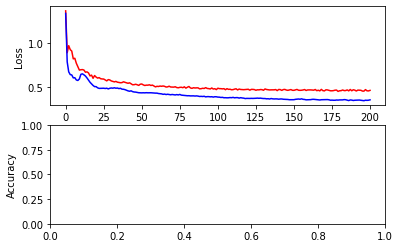

In [ ]:
import torch
arch = '1'
val2 = torch.stack(trai_lo).cpu().detach().numpy()
train2 = torch.stack(val_lo).cpu().detach().numpy()
fig, ax = plt.subplots(2)

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

ax[0].plot(val2, color='red') 
ax[0].plot(train2, color='blue') 

#ax[1].plot(history.history['accuracy'], color='red') 
#ax[1].plot(history.history['val_accuracy'], color='blue') 

#filename2 = 'train_history'+str(arch)+'.png'
#fig.savefig(filename2)
plt.show()

In [ ]:
#TEST SET FOR GAT
#APO OTI FENETAI MA8AINEI NA DIALEGEI PANTA THN MAJORITY CLASS ISWS POLLA HEADS
acc_GAT, auc_roc_acc_GAT, precision_score_GAT, recall_score_GAT, conf_mat_GAT = test(best,data3)

print(acc_GAT)
print(auc_roc_acc_GAT)
print(precision_score_GAT)
print(recall_score_GAT)
print(conf_mat_GAT)

In [ ]:
import itertools

layers = [2,3]
embe = [64,128]
loader = [0,1]
heads = [4,8]
counter = 0
for xs in itertools.product(layers, embe, loader, heads):
  counter = counter +1
  print(xs)
print(counter)